In [1]:
# import libraries we will use
import os 
import sys 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuos attributes (sourced from [here](http://archive.ics.uci.edu/ml/datasets/Auto+MPG))


Attribute Information:

    1. mpg: continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)

Open up the data file in vs code. You can use a regex expression to replace all tab characters with a space. This is a cruicial step in order to read the data properly in the next stage.

In [2]:
# Read and load the file into a dataframe
df = pd.read_csv("./data/auto-mpg.data", names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'], sep=" ",skipinitialspace=True)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Horsepower seems to me like it should be a numeric. Lets investigate why its Dtype is an object.

In [4]:
# get unique values
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

lets read in the data once more, this time making "?" be our null entry

In [5]:
df = pd.read_csv("./data/auto-mpg.data", names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'], sep=" ",skipinitialspace=True, na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Great! Before we kick off some machine learning we still need to do some data preprocessing. Specifically our car name is type string and so we will need to one hot encode our car names for model exploration.

In [6]:
# lets see all unique car names
df.car_name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

Lets generalize the car make to the following categories:
- buick
- mazda
- chevrolet or chevy
- toyota
- ford
- dodge
- volks or vw
- chrysler or plymouth or pontiac
- honda
- nissan or datsun
- amc
- fiat
- bmw
-volvo
- other

This is definitely not exhaustive, but hey! something is better than nothing.

In [7]:
# we will use the string library to modify our strings
import string
data=df.copy()

car_names = df.car_name.values.tolist()

for i in range(len(car_names)):
    name=car_names[i]
    if 'buick' in name:
        car_names[i]='buick'
    elif 'mazda' in name:
        car_names[i]='mazda'
    elif 'chev' in name:
        car_names[i]="chevy"
    elif 'toyota' in name:
        car_names[i]="toyota"
    elif 'ford' in name or 'mercury' in name:
        car_names[i]="ford" 
    elif 'dodge' in name:
        car_names[i]="dodge"
    elif 'volks' in name or 'vw' in name:
        car_names[i]="volkswagon"
    elif 'chrysler' in name or 'plymouth' in name or 'pontiac' in name:
        car_names[i]="chrysler"
    elif 'honda' in name:
        car_names[i]="honda"
    elif 'nissan' in name or 'datsun' in name:
        car_names[i]="nissan"
    elif 'amc' in name:
        car_names[i]='amc'
    elif 'volvo' in name:
        car_names[i] = 'volvo'
    elif 'audi' in name:
        car_names[i] = 'audi'
    elif 'bmw' in name:
        car_names[i] = 'bmw'
    elif 'fiat' in name:
        car_names[i] ='fiat'
    else:
        print(car_names[i])
        car_names[i] = 'other'

#overwrite with new car names
df.car_name = car_names

df.car_name.unique()

peugeot 504
saab 99e
hi 1200d
opel 1900
peugeot 304
oldsmobile delta 88 royale
peugeot 504 (sw)
renault 12 (sw)
toyouta corona mark ii (sw)
oldsmobile vista cruiser
maxda rx3
opel manta
saab 99le
oldsmobile omega
opel manta
subaru
peugeot 504
saab 99le
opel 1900
capri ii
renault 12tl
peugeot 504
mercedes-benz 280s
cadillac seville
renault 5 gtl
oldsmobile cutlass supreme
subaru dl
oldsmobile cutlass salon brougham
oldsmobile starfire sx
saab 99gle
peugeot 604sl
maxda glc deluxe
mercedes benz 300d
cadillac eldorado
peugeot 504
oldsmobile cutlass salon brougham
oldsmobile omega brougham
mercedes-benz 240d
renault lecar deluxe
subaru dl
vokswagen rabbit
triumph tr7 coupe
subaru
renault 18i
peugeot 505s turbo diesel
oldsmobile cutlass ls
oldsmobile cutlass ciera (diesel)


array(['chevy', 'buick', 'chrysler', 'amc', 'ford', 'dodge', 'toyota',
       'nissan', 'volkswagon', 'other', 'audi', 'bmw', 'fiat', 'mazda',
       'volvo', 'honda'], dtype=object)

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In order to train our model we will have to one hot encode some features like car_names and origin (because these are not ordinal in nature). Cylinders and car year, while multi-discrete, have some ordinal nature to them.

In [9]:
df = pd.get_dummies(df,columns=['origin'], prefix='origin',prefix_sep='')
df = pd.get_dummies(df,columns=['car_name'],prefix='',prefix_sep='')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin1  origin2  origin3  ...  dodge  fiat  ford  honda  \
0          70        1        0        0  ...      0     0     0      0   
1          70        1        0        0  ...      0     0     0      0   
2          70        1        0        0  ...      0     0     0      0   
3          70        1        0        0  ...      0     0     0      0   
4          70        1        0        0  ...      0     0     1      0   

   mazda  nissan  other  toyota  volkswagon  volvo  
0      0       0      0       0           0      0  
1      0       0      

lets deal with our missing data

    1. Approach DR - drop those observations with null
    2. Approach DC - drop the column with null
    3. Approach I - imputation with mean
    4. Approach II - add indicator with an imputation

There are more advanced missingness techniques, but for this project lets try and keep it simple

In [10]:
# create data sets with dealing with missing values
# drop row
df_DR = df.dropna()
# drop column
df_DC = df.drop(['horsepower'],axis=1)
# impute with average
df_I = df.fillna(value=df.mean())
# add indicator column for imputation
df_II = df.copy()
df_II["horsepower_imputed"] = df.horsepower.isna()
df_II["horsepower_imputed"] = df_II.horsepower_imputed.astype(int)
df_II = df_II.fillna(value=df.mean())

#sanity check
print(df_DR.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin1         0
origin2         0
origin3         0
amc             0
audi            0
bmw             0
buick           0
chevy           0
chrysler        0
dodge           0
fiat            0
ford            0
honda           0
mazda           0
nissan          0
other           0
toyota          0
volkswagon      0
volvo           0
dtype: int64


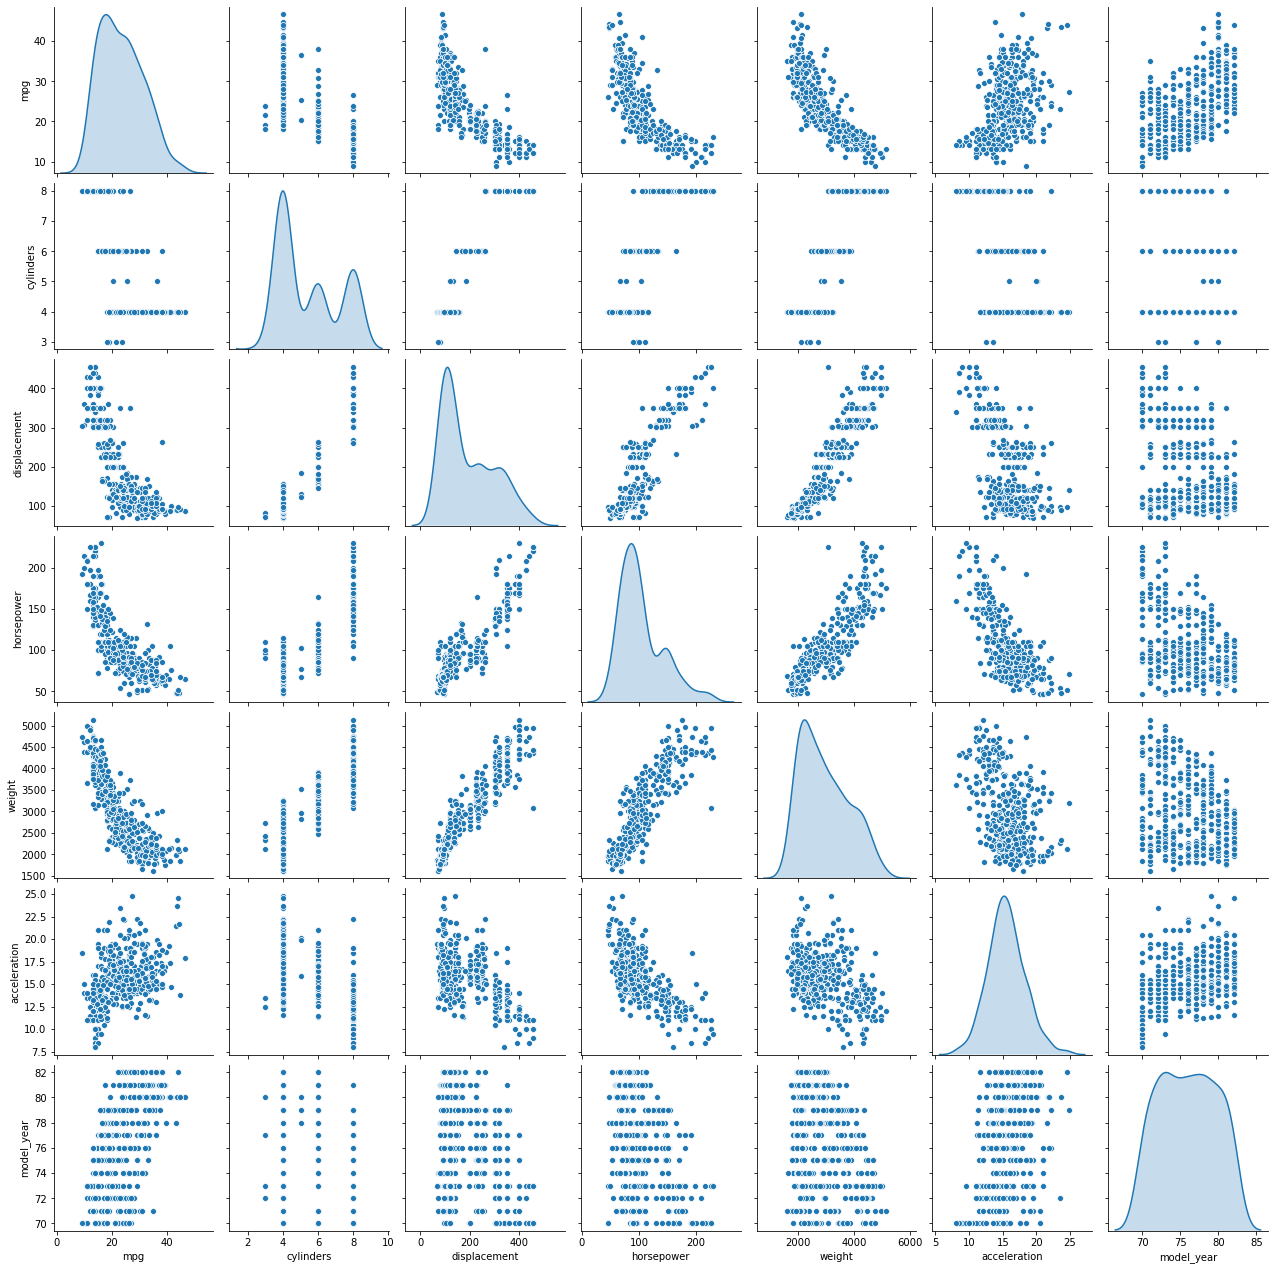

In [11]:
# pairplots to get an intuition of potential correlations

sns.pairplot(df_I[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']], diag_kind="kde")


Lets create an additional dataset which extracts polynomial features

In [12]:
# create some additional features for training
df_I['displacement_on_power'] = df_I['displacement'] / df_I['horsepower']
df_I['weight_on_cylinder'] = df_I['weight'] / df_I['cylinders']
df_I['acceleration_on_power'] = df_I['acceleration'] / df_I['horsepower']
df_I['acceleration_on_cyl'] = df_I['acceleration'] / df_I['cylinders']
df_I['displacement_square'] = df_I['displacement']**2
df_I['acceleration_square'] = df_I['acceleration']**2
df_I['horsepower_square'] = df_I['horsepower']**2

# lets examine the correlation
corr_matrix = df_I.corr()
corr_matrix['mpg'].sort_values(ascending=False)

mpg                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.702324
model_year               0.579267
origin3                  0.442174
acceleration             0.420289
acceleration_square      0.400170
origin2                  0.259022
volkswagon               0.254680
nissan                   0.253188
honda                    0.241212
toyota                   0.161096
mazda                    0.151065
fiat                     0.099038
other                    0.065543
audi                     0.054845
bmw                      0.002143
weight_on_cylinder      -0.020778
volvo                   -0.038004
dodge                   -0.051235
buick                   -0.117229
chrysler                -0.141794
chevy                   -0.154479
amc                     -0.185651
ford                    -0.215857
origin1                 -0.568192
displacement_on_power   -0.577057
horsepower_square       -0.707096
displacement_square     -0.750854
horsepower    

okay at long last we can begin our train val test splits. We will stratisfy by cylinders to keep class balance.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# train and test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(df_I, df_I["cylinders"]):
    strat_train_set = df_I.loc[train_index]
    strat_valtest_set = df_I.loc[test_index]

#sanity check
#print(strat_train_set.shape)
#print(strat_valtest_set.shape)

# get features and labels 
features_train = strat_train_set.drop('mpg',axis=1).to_numpy()
labels_train = strat_train_set['mpg'].to_numpy()

features_test = strat_valtest_set.drop('mpg',axis=1).to_numpy()
labels_test = strat_valtest_set['mpg'].to_numpy()

#sanity check
#print(features_train)
#print(features_train.shape)
#print(labels_train.shape)
#print(labels_train)


We don't have that much data but lets see what random forest can do

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,8,16]
}
rf=RandomForestRegressor(random_state=42)
CV_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,refit=True)
CV_rf.fit(features_train,labels_train)
print(CV_rf.best_params_)
print(mean_squared_error(labels_test,CV_rf.predict(features_test)))

{'max_depth': 16, 'max_features': 'auto', 'n_estimators': 500}
7.345511749366724


In [18]:
print("final rmse %f" %np.sqrt(mean_squared_error(labels_test,CV_rf.predict(features_test))))

final rmse 2.710260


Not bad! However, this was with the imputed data... The datasets are made to run the same tests with dropped rows, dropped columns, or imputation with an indicator.